In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv('./listings.csv')
df.shape


C:\Users\panaham\AppData\Local\Temp\ipykernel_7728\2601442123.py:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./listings.csv')


(42931, 75)

In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,801749842377802394,https://www.airbnb.com/rooms/801749842377802394,20230306014634,2023-03-06,city scrape,A home away from home,The whole group will be comfortable in this sp...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,495455523,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,765948794133787266,https://www.airbnb.com/rooms/765948794133787266,20230306014634,2023-03-06,city scrape,Brooklyn Refuge,Take a break and unwind at this peaceful oasis.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,488760226,...,4.92,4.85,4.92,NaN,t,2,1,1,0,4.29
2,636274456676328779,https://www.airbnb.com/rooms/636274456676328779,20230306014634,2023-03-06,city scrape,Villa Masino.,Close to beach Peaceful walk to park & beach...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,461263600,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,768125251187660469,https://www.airbnb.com/rooms/768125251187660469,20230306014634,2023-03-06,city scrape,1-Bedroom Private Room with King Size Bed,Private room with king size bedroom near Sheep...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,475699129,...,5.00,5.00,5.00,NaN,t,7,0,7,0,5.17
4,49248255,https://www.airbnb.com/rooms/49248255,20230306014634,2023-03-06,city scrape,Get the best of both worlds in Riverdale!,Welcome to the greatest location if you desire...,You will find within walking distance the Metr...,https://a0.muscache.com/pictures/e8e13cf7-44e9...,397288055,...,4.88,4.72,4.64,NaN,f,1,1,0,0,1.11


In [4]:
df = df[['id', 'host_since', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']]

In [5]:
#id: A unique identifier for each Airbnb listing.
#name: The name or title of the Airbnb listing.
#host_id: A unique identifier for the host of the Airbnb listing.
#host_name: The name of the host of the Airbnb listing.
#neighbourhood_group: The borough (i.e. neighborhood group) in which the Airbnb listing is located.
#neighbourhood: The specific neighborhood in which the Airbnb listing is located.
#latitude: The latitude coordinate of the Airbnb listing's location.
#longitude: The longitude coordinate of the Airbnb listing's location.
#room_type: The type of room or space that is being rented (e.g. Entire home/apt, Private room, Shared room).
#price: The nightly price for the Airbnb listing.
#minimum_nights: The minimum number of nights that a renter must stay in the Airbnb listing.
#number_of_reviews: The number of reviews that the Airbnb listing has received.
#last_review: The date of the most recent review of the Airbnb listing.
#reviews_per_month: The average number of reviews per month for the Airbnb listing.
#calculated_host_listings_count: The number of listings that the host has on Airbnb.
#availability_365: The number of days that the Airbnb listing is available for rent during the next 365 days.

In [6]:
df.dtypes

id                                int64
host_since                       object
host_response_rate               object
host_acceptance_rate             object
host_is_superhost                object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
amenities                        object
price                            object
availability_365                  int64
number_of_reviews                 int64
review_scores_rating            float64
reviews_per_month               float64
dtype: object

Let's convert price to the number:

In [7]:
# Replace the '$' sign with an empty string in the 'price' column
df['price'] = df['price'].str.replace('$', '')

# Remove commas from the 'price' column
df['price'] = df['price'].str.replace(',', '')

# Convert the 'price' column to float
df['price'] = df['price'].astype(float)

C:\Users\panaham\AppData\Local\Temp\ipykernel_7728\1582356637.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')


<Axes: >

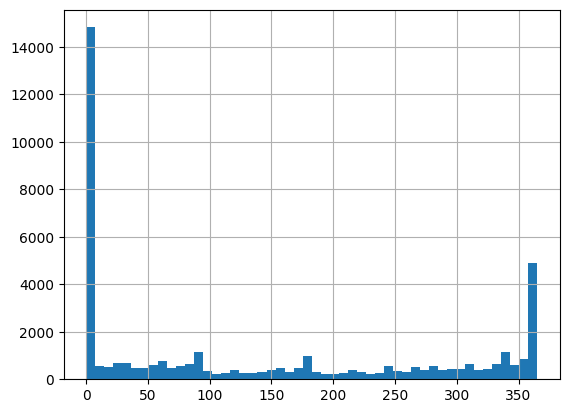

In [8]:
df['availability_365'].hist(bins=50)

In [9]:
#summarize of null cells:
df.isnull().sum()

id                                  0
host_since                          5
host_response_rate              14532
host_acceptance_rate            12564
host_is_superhost                  25
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
room_type                           0
accommodates                        0
bathrooms                       42931
bedrooms                         3874
beds                              929
amenities                           0
price                               0
availability_365                    0
number_of_reviews                   0
review_scores_rating            10304
reviews_per_month               10304
dtype: int64

In [10]:
# Check for duplicates
print(df.duplicated().sum())

0


In [11]:
df.shape

(42931, 20)

Based on null values report the number of null records for columns: "host_response_rate",  "host_acceptance_rate", "bathrooms", "review_scores_rating" and "reviews_per_month" are to high so we delete these columns. 

For the columns : "host_since", "host_is_superhost", "bedrooms" and "beds" the null values are fewer so we delete records that have null values for these records.

In [12]:
df = df.drop(["host_response_rate",  "host_acceptance_rate", "bathrooms", "review_scores_rating", "reviews_per_month"], axis=1)
df.dropna(subset=["host_since", "host_is_superhost", "bedrooms", "beds"], inplace=True)
df.shape

(38286, 15)

In [13]:
# Check for outliers
print(df.describe())

                 id      latitude     longitude  accommodates      bedrooms  \
count  3.828600e+04  38286.000000  38286.000000  38286.000000  38286.000000   
mean   2.304719e+17     40.727369    -73.941737      3.032649      1.404795   
std    3.375619e+17      0.058508      0.057355      2.140496      0.795614   
min    5.121000e+03     40.500314    -74.251907      1.000000      1.000000   
25%    1.924132e+07     40.686450    -73.980277      2.000000      1.000000   
50%    4.339456e+07     40.721650    -73.950710      2.000000      1.000000   
75%    6.399281e+17     40.762290    -73.921880      4.000000      2.000000   
max    8.404660e+17     40.911380    -73.710870     16.000000     16.000000   

               beds         price  availability_365  number_of_reviews  
count  38286.000000  38286.000000      38286.000000       38286.000000  
mean       1.693178    199.310714        140.614611          26.193073  
std        1.207987    792.647544        141.924860          56.18788

In [14]:
# Explore the 'neighbourhood_group' column
print(df['neighbourhood_group_cleansed'].value_counts())

Brooklyn         15060
Manhattan        14755
Queens            6491
Bronx             1582
Staten Island      398
Name: neighbourhood_group_cleansed, dtype: int64


<Axes: >

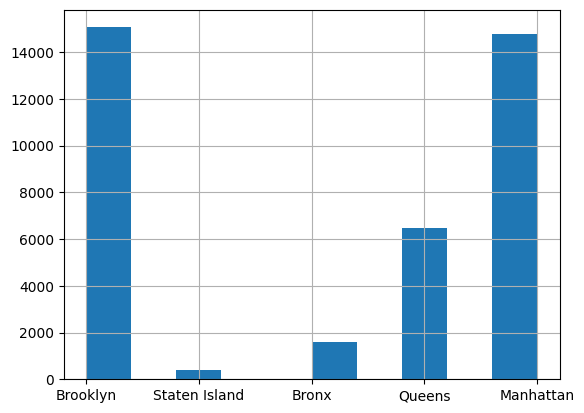

In [15]:
df['neighbourhood_group_cleansed'].hist()

In [16]:
# Explore the 'neighbourhood' column
print(df['neighbourhood_cleansed'].value_counts())

Bedford-Stuyvesant    2900
Williamsburg          2391
Harlem                1920
Bushwick              1690
Midtown               1574
                      ... 
Breezy Point             1
Lighthouse Hill          1
Fort Wadsworth           1
Willowbrook              1
Neponsit                 1
Name: neighbourhood_cleansed, Length: 222, dtype: int64


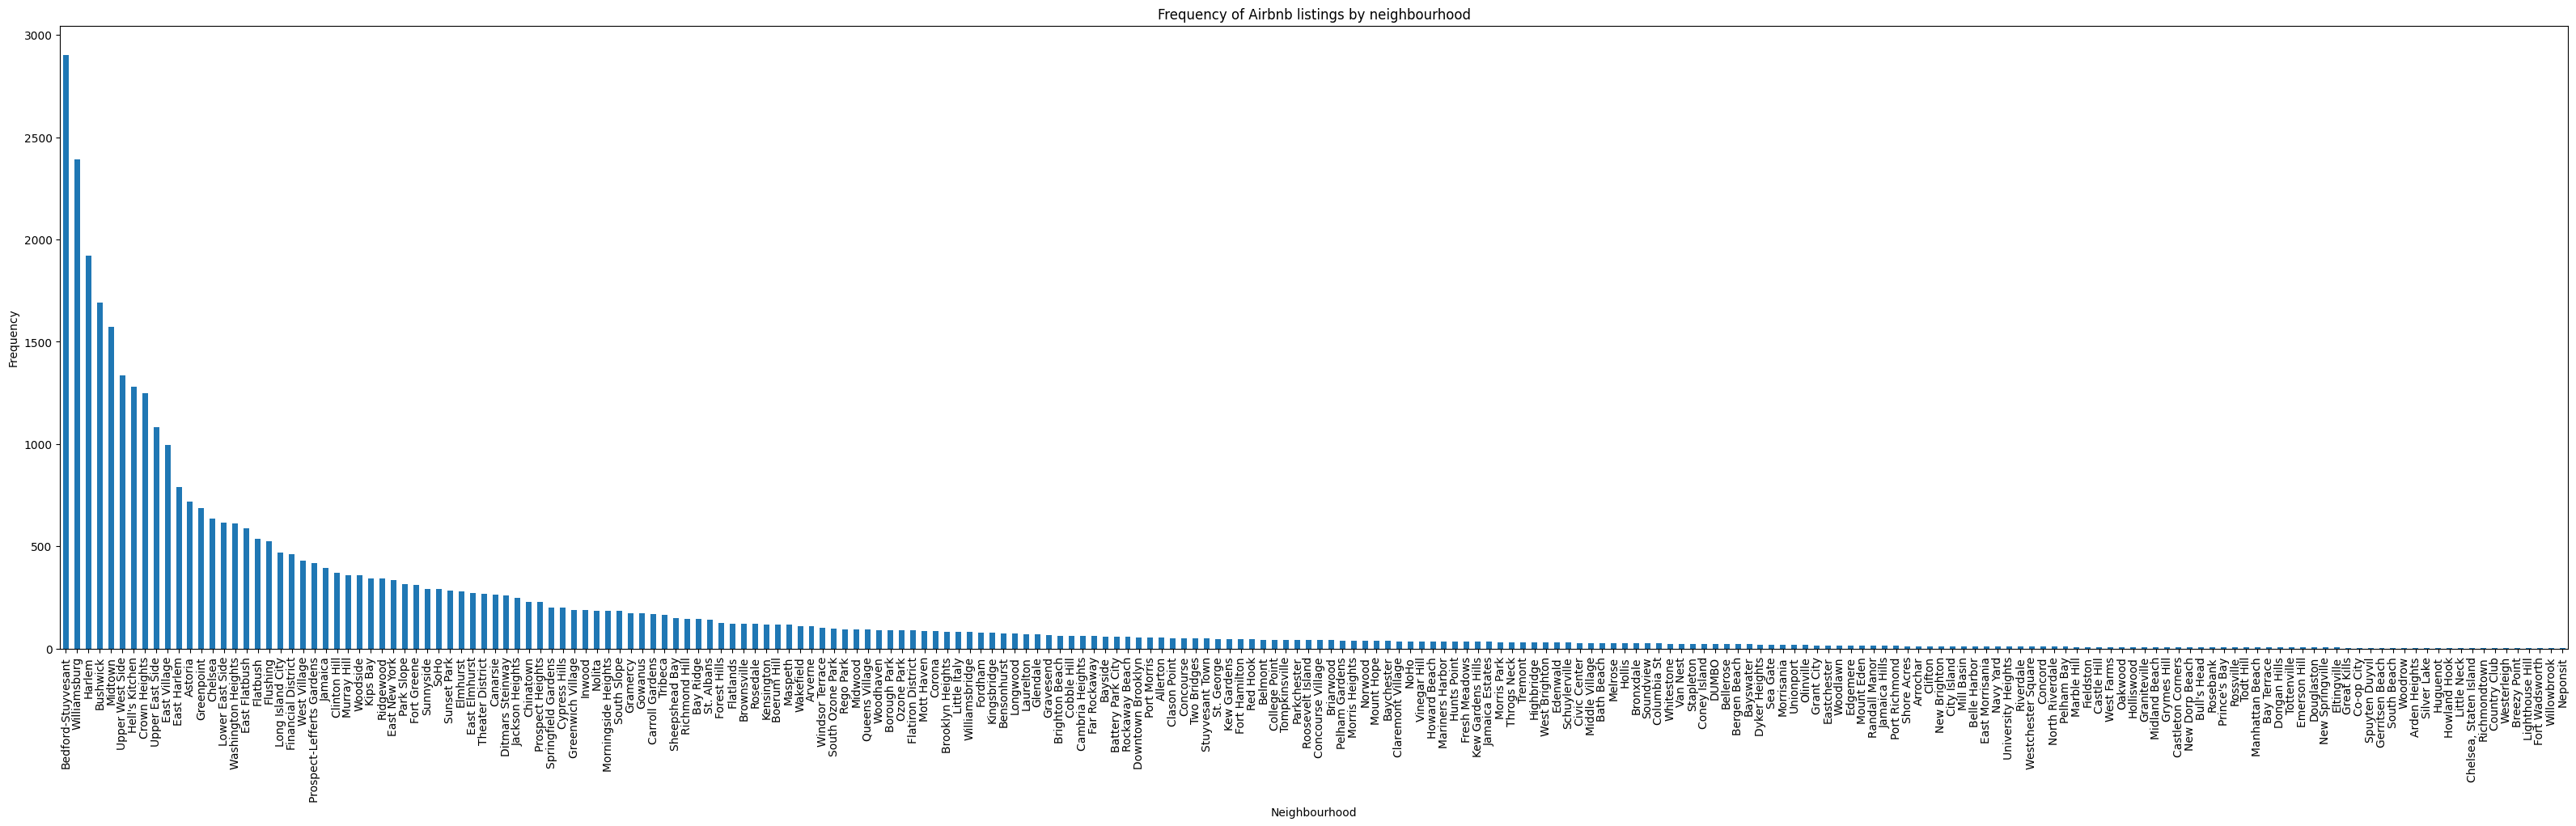

In [17]:
# count the occurrences of each category in the "neighbourhood_group" column
counts = df["neighbourhood_cleansed"].value_counts()


plt.figure(figsize=(40,10))
# plot a bar chart of the counts
counts.plot.bar()

# set the plot title and axis labels
plt.title("Frequency of Airbnb listings by neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Frequency")

# show the plot
plt.show()

In [18]:

# Explore the 'room_type' column
print(df['room_type'].value_counts())

Entire home/apt    20692
Private room       16888
Shared room          549
Hotel room           157
Name: room_type, dtype: int64


In [19]:
# Explore the 'price' column
print(df['price'].describe())

count    38286.000000
mean       199.310714
std        792.647544
min         10.000000
25%         75.000000
50%        125.000000
75%        204.000000
max      85170.000000
Name: price, dtype: float64


In [20]:
# Explore the 'availability_365' column
print(df['availability_365'].describe())

count    38286.000000
mean       140.614611
std        141.924860
min          0.000000
25%          0.000000
50%         89.000000
75%        289.000000
max        365.000000
Name: availability_365, dtype: float64


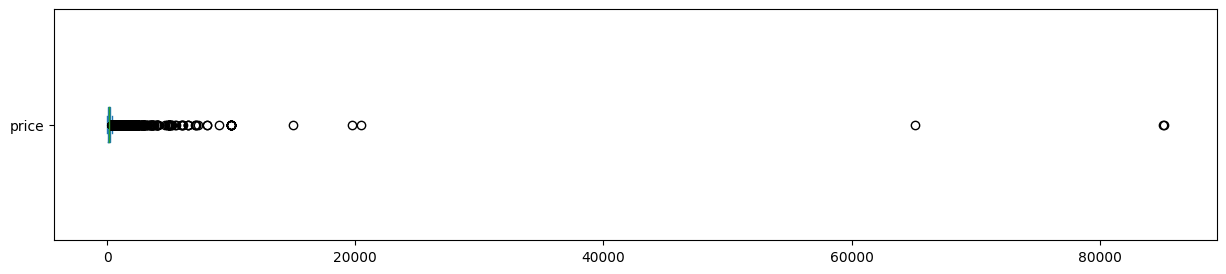

Values over $2000.00: 
157
0.4101%


In [21]:

# Displaying the box plot
df['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of prices that are equal to  500.00
print('Values over $2000.00: ')
print(len(df[df['price'] > 2000]))
print('{:.4f}%'.format((len(df[df['price'] > 2000]) / df.shape[0]) * 100))

In [23]:
data = df[['latitude', 'longitude', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'price', 'accommodates', 'room_type', 'amenities', 'availability_365', 'number_of_reviews']]

# Selecting the rows that fulfil the established requirements
data = data[(data['price'] <= 2000) & (data['price'] > 0) ].copy()
data.reset_index()

,index,latitude,longitude,neighbourhood_cleansed,neighbourhood_group_cleansed,price,accommodates,room_type,amenities,availability_365,number_of_reviews
0,0,40.640403,-73.888535,Canarsie,Brooklyn,143.0,2,Private room,"[""50\"" TV"", ""Bathtub"", ""Microwave"", ""Free driv...",364,0
1,1,40.648510,-73.894330,Canarsie,Brooklyn,30.0,1,Private room,"[""Free parking on premises"", ""Carbon monoxide ...",41,13
2,2,40.507114,-74.251907,Tottenville,Staten Island,157.0,6,Entire home/apt,"[""BBQ grill"", ""Security cameras on property"", ...",364,0
3,3,40.583490,-73.959880,Sheepshead Bay,Brooklyn,89.0,2,Private room,"[""Security cameras on property"", ""Keypad"", ""Ca...",364,15
4,4,40.903260,-73.907090,North Riverdale,Bronx,125.0,3,Entire home/apt,"[""Hangers"", ""Clothing storage: closet"", ""Secur...",46,25
...,...,...,...,...,...,...,...,...,...,...,...
38124,42925,40.720300,-73.984240,Lower East Side,Manhattan,350.0,5,Entire home/apt,"[""Hangers"", ""Security cameras on property"", ""D...",80,47
38125,42926,40.726110,-73.988010,East Village,Manhattan,85.0,1,Private room,"[""Hangers"", ""Kitchen"", ""Dishes and silverware""...",0,0
38126,42927,40.762150,-73.990270,Hell's Kitchen,Manhattan,208.0,6,Entire home/apt,"[""Hangers"", ""Microwave"", ""Dishwasher"", ""Dishes...",23,217
38127,42928,40.717330,-73.991110,Lower East Side,Manhattan,125.0,3,Entire home/apt,"[""Hangers"", ""Dishes and silverware"", ""Lockbox""...",191,7


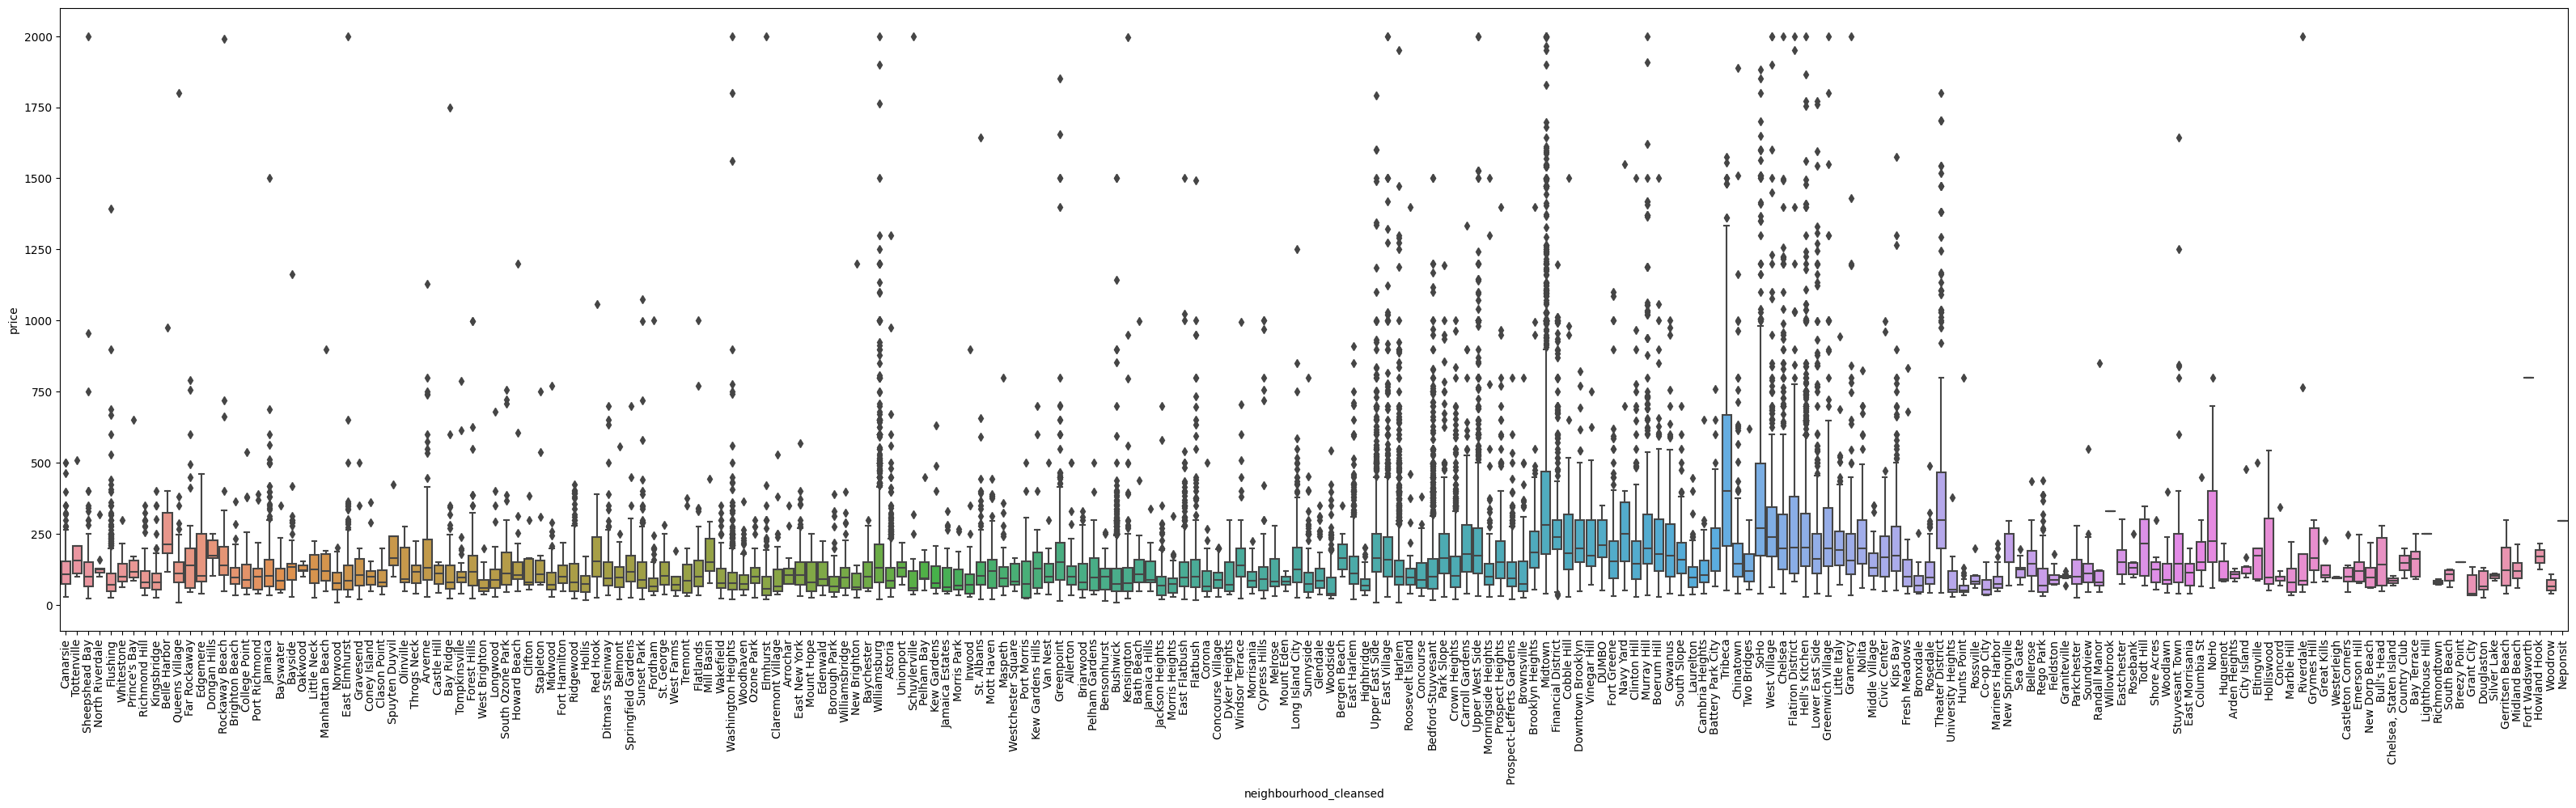

In [26]:
import seaborn as sns
plt.figure(figsize=(40,10))
sns.boxplot(x='neighbourhood_cleansed', y='price', data=data)
plt.xticks(rotation=90)
plt.show()

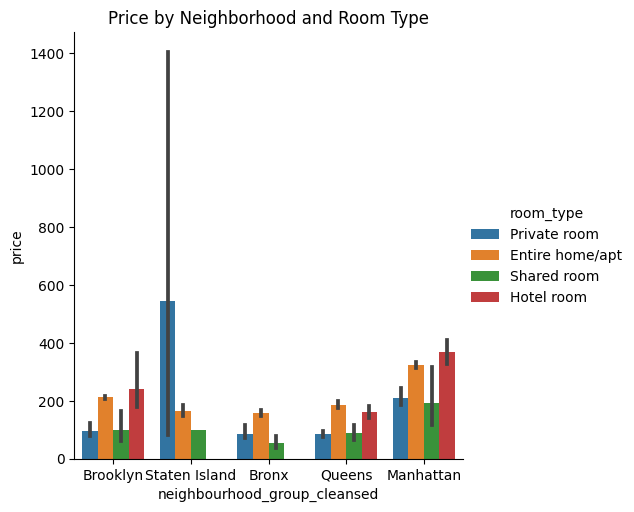

In [27]:
sns.catplot(x="neighbourhood_group_cleansed", y="price", hue="room_type", kind="bar", data=df)
plt.title("Price by Neighborhood and Room Type")
plt.show()

<Figure size 1200x800 with 0 Axes>

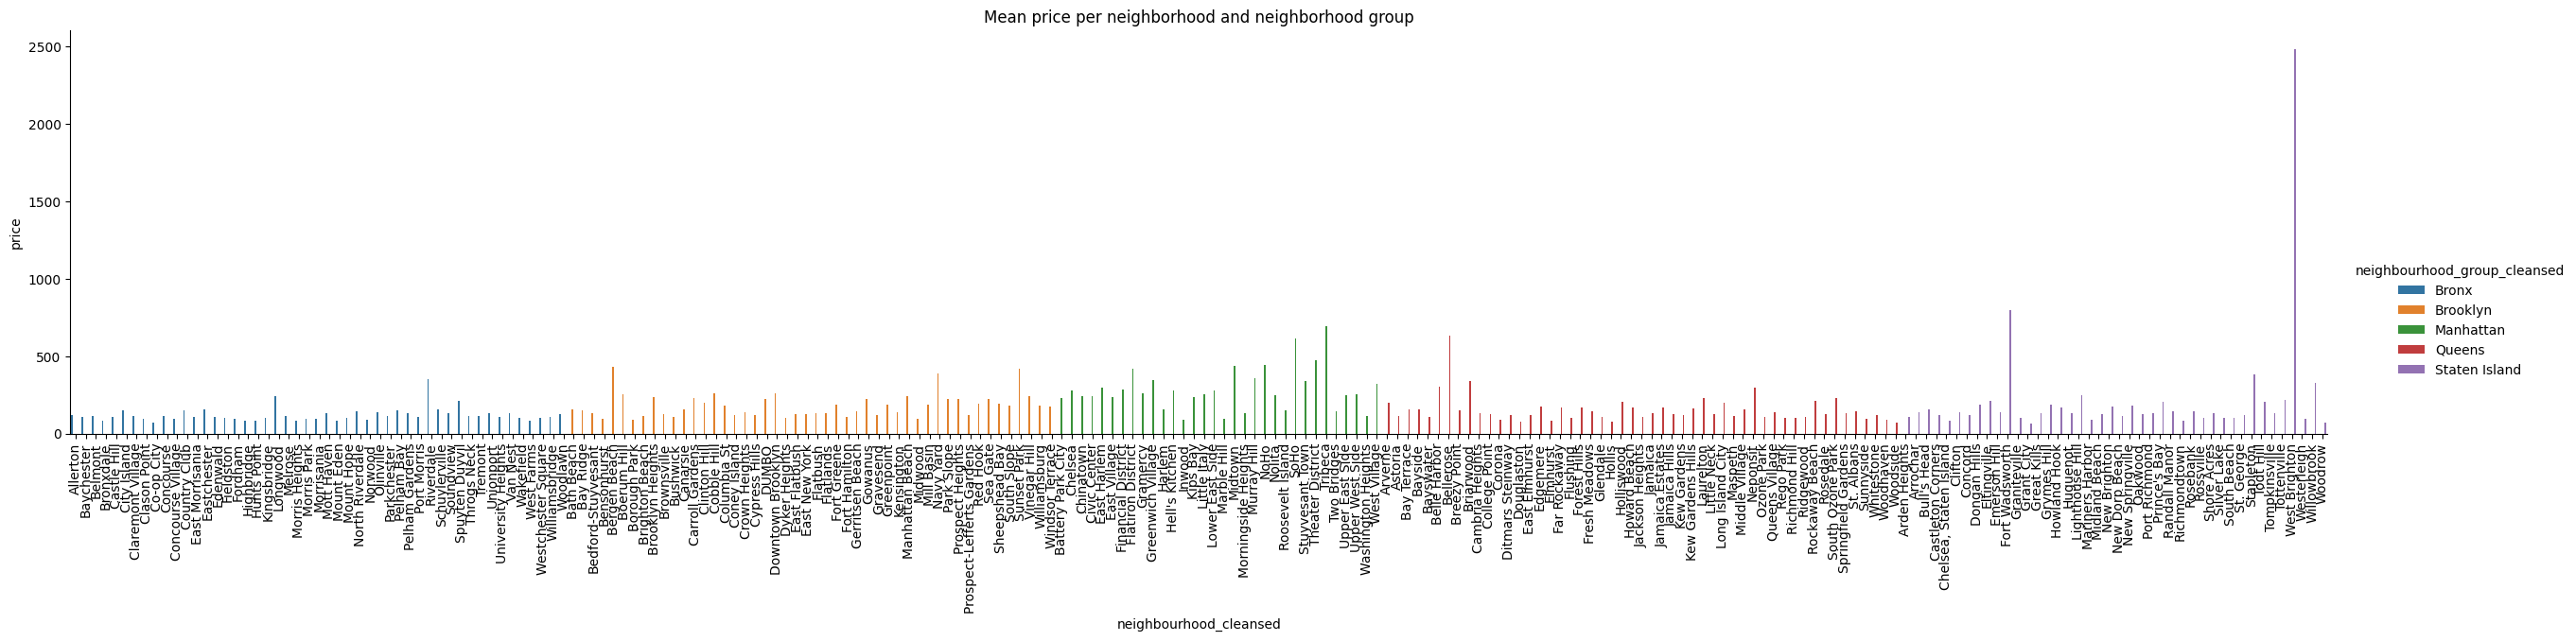

In [ ]:
plt.figure(figsize=(12, 8))
grouped_df = df.groupby(['neighbourhood_group_cleansed', 'neighbourhood_cleansed'])['price'].mean().reset_index()
sns.catplot(x="neighbourhood_cleansed", y="price", hue="neighbourhood_group_cleansed", kind="bar", data=grouped_df, height=5, aspect=5)
plt.title("Mean price per neighborhood and neighborhood group")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.shape

(38286, 15)

In [28]:
import re
# create a set of unique amenities
unique_amenities = set()

# loop through each row in the dataframe
for index, row in df.iterrows():
    # use regular expressions to extract amenities from string
    amenities_list = re.findall('"([^"]*)"', row['amenities'])
    # add each amenity to the unique_amenities set
    for amenity in amenities_list:
        unique_amenities.add(amenity)

# print the number of unique amenities
print(len(unique_amenities))

5131


There are 5131 different amenities which are too much to use them. So we are tyring to decrease them by grouping similar ones.

In [29]:
import pandas as pd
import re

# define a dictionary of standardized amenities
standardized_amenities = {
    'wifi': 'Wifi',
    'tv': 'TV',
    'cable tv': 'TV',
    'oven': 'Oven',
    'gas oven': 'Oven',
    'stove': 'Stove',
    'gas stove': 'Stove',
    'conditioner': 'Conditioner',
    'shampoo' : 'Shampoo',
    'soap' : 'Soap',
    'sound system': 'Sound system',
    'refrigerator' : 'Refrigerator',
    'pool': 'pool',
    'pool' : 'pool',
    'bbq' : 'BBQ',
    'book': 'Book',
    'coffee': 'Coffee',
    'clothing': 'Clothing',
    'exercise equipment' : 'Exercise equipment',
    'game' : 'Game', 
    'fireplace' : 'Fireplace',
    'parking' : 'Parking',
    'garage' : 'Garage',
    'crib' : 'Crib',
    'dryer' : 'Dryer',
    'washer' : 'Washer',
    'backyard' : 'Backyard',
    'gym' : 'Gym',
    'ev charger' : 'EV Cahrger',
    'hot tub' : 'Hot-Tube',
    'high chair' : 'High chair',
    'carport' : 'Carport',
    'baby bath' : 'Baby bath',
    'baby monitor' : 'Baby monitor',
    'beach access' : 'Beach access',
    'changing table' : 'changing table',
    
    
}

# create a set of unique amenities
unique_amenities = set()

# loop through each row in the dataframe
for index, row in df.iterrows():
    # use regular expressions to extract amenities from string
    amenities_list = re.findall('"([^"]*)"', row['amenities'])
    # standardize the amenities
    standardized_list = []
    for amenity in amenities_list:
        amenity_lower = amenity.lower()
        for key, value in standardized_amenities.items():
            if key in amenity_lower:
                standardized_list.append(value)
                break
        else:
            standardized_list.append(amenity)

        standardized_list = [amenity for amenity in standardized_list if not amenity.endswith('\\')]
        standardized_list = [amenity for amenity in standardized_list if not amenity.endswith(', ')]
    # add each standardized amenity to the unique_amenities set
    for amenity in standardized_list:
        unique_amenities.add(amenity)

# print the number of unique amenities
print(len(unique_amenities))


152


We a little trys finally we could create a unique list of amenities:

In [ ]:
unique_amenities

{', ',
 'AC - split type ductless system',
 'Air conditioning',
 'BBQ',
 'Baby bath',
 'Baby monitor',
 'Baby safety gates',
 'Babysitter recommendations',
 'Backyard',
 'Baking sheet',
 'Barbecue utensils',
 'Bathtub',
 'Bay view',
 'Beach access',
 'Beach essentials',
 'Beach view',
 'Bed linens',
 'Bidet',
 'Bikes',
 'Blender',
 'Boat slip',
 'Book',
 'Bread maker',
 'Breakfast',
 'Building staff',
 'Canal view',
 'Carbon monoxide alarm',
 'Carport',
 'Ceiling fan',
 'Central air conditioning',
 'Central heating',
 'Children\\u2019s dinnerware',
 'City skyline view',
 'Cleaning available during stay',
 'Cleaning products',
 'Clothing',
 'Coffee',
 'Conditioner',
 'Cooking basics',
 'Courtyard view',
 'Crib',
 'Dedicated workspace',
 'Desert view',
 'Dining table',
 'Dishes and silverware',
 'Dryer',
 'EV Cahrger',
 'Elevator',
 'Essentials',
 'Ethernet connection',
 'Exercise equipment',
 'Extra pillows and blankets',
 'Fire extinguisher',
 'Fire pit',
 'Fireplace',
 'First aid kit'

In [30]:
# create one-hot encoded columns for each unique amenity
for amenity in unique_amenities:
    df[amenity] = df['amenities'].str.contains(amenity).astype(int)

# drop the original amenities column
df.drop('amenities', axis=1, inplace=True)

print(df)

C:\Users\panaham\AppData\Local\Temp\ipykernel_7728\2036238835.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].str.contains(amenity).astype(int)
C:\Users\panaham\AppData\Local\Temp\ipykernel_7728\2036238835.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].str.contains(amenity).astype(int)
C:\Users\panaham\AppData\Local\Temp\ipykernel_7728\2036238835.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

                       id  host_since host_is_superhost  \
0      801749842377802394  2023-01-10                 f   
1      765948794133787266  2022-11-22                 f   
2      636274456676328779  2022-05-27                 f   
3      768125251187660469  2022-08-18                 t   
4                49248255  2021-04-16                 f   
...                   ...         ...               ...   
42925              150804  2011-06-21                 t   
42926            40342902  2016-08-17                 f   
42927            35257699  2019-05-29                 f   
42928            52491515  2019-10-30                 f   
42929            48158801  2013-05-27                 f   

      neighbourhood_cleansed neighbourhood_group_cleansed   latitude  \
0                   Canarsie                     Brooklyn  40.640403   
1                   Canarsie                     Brooklyn  40.648510   
2                Tottenville                Staten Island  40.507114   
3  

C:\Users\panaham\AppData\Local\Temp\ipykernel_7728\2036238835.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].str.contains(amenity).astype(int)
C:\Users\panaham\AppData\Local\Temp\ipykernel_7728\2036238835.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].str.contains(amenity).astype(int)
C:\Users\panaham\AppData\Local\Temp\ipykernel_7728\2036238835.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

In [31]:
df.shape

(38286, 166)

Now we encode other categorical features:

In [32]:
df.dtypes

id                               int64
host_since                      object
host_is_superhost               object
neighbourhood_cleansed          object
neighbourhood_group_cleansed    object
                                 ...  
Hammock                          int32
Desert view                      int32
Bed linens                       int32
Shampoo                          int32
Resort access                    int32
Length: 166, dtype: object

In [33]:
df[unique_amenities]

C:\Users\panaham\AppData\Local\Temp\ipykernel_7728\3295202026.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[unique_amenities]


,Lockbox,Dining table,Coffee,Hot water kettle,Patio or balcony,Smart lock,Central air conditioning,Park view,Beach view,Private sauna,...,Fireplace,Outdoor furniture,Toaster,Extra pillows and blankets,Outdoor shower,Hammock,Desert view,Bed linens,Shampoo,Resort access
0,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42925,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
42926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
42927,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
42928,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
import joblib

num_features = ['latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price']



cat_features = ['neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'room_type', 'host_is_superhost']

encoder = LabelEncoder()

df_cat = df[cat_features]

for feature in cat_features:
    encoder.fit(df[feature])
    # Save the label encoder to a file
    joblib.dump(encoder, feature + '.joblib')
    df_cat[feature] = encoder.transform(df[feature])


df_non_amenities = pd.concat([pd.DataFrame(df_cat), df[num_features]], axis=1)

df_non_amenities

C:\Users\panaham\AppData\Local\Temp\ipykernel_7728\2406595035.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[feature] = encoder.transform(df[feature])
C:\Users\panaham\AppData\Local\Temp\ipykernel_7728\2406595035.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[feature] = encoder.transform(df[feature])
C:\Users\panaham\AppData\Local\Temp\ipykernel_7728\2406595035.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,host_is_superhost,latitude,longitude,accommodates,bedrooms,beds,price
0,29,1,2,0,40.640403,-73.888535,2,1.0,1.0,143.0
1,29,1,2,0,40.648510,-73.894330,1,1.0,1.0,30.0
2,196,4,0,0,40.507114,-74.251907,6,2.0,2.0,157.0
3,176,1,2,1,40.583490,-73.959880,2,3.0,1.0,89.0
4,147,0,0,0,40.903260,-73.907090,3,2.0,2.0,125.0
...,...,...,...,...,...,...,...,...,...,...
42925,121,2,0,1,40.720300,-73.984240,5,2.0,3.0,350.0
42926,65,2,2,0,40.726110,-73.988010,1,1.0,1.0,85.0
42927,97,2,0,0,40.762150,-73.990270,6,2.0,3.0,208.0
42928,121,2,0,0,40.717330,-73.991110,3,3.0,3.0,125.0


Since amenities did not help us to have a betterer prediction here we try to predict just with non-amenities columns:

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = df_non_amenities.drop(['price', 'neighbourhood_cleansed', 'neighbourhood_cleansed'], axis=1)
y = df_non_amenities['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)

R^2 score: -0.028350955327464566


As the score shows Random Forest model on non-amenities features does not have an acceptable result.

Let's try linear rgression:

In [49]:
import pickle
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

scaled_data = preprocessing.scale(X)  
scaled_data

array([[-0.86110986,  1.05296804, -0.53771211, ..., -0.48244086,
        -0.50879029, -0.57383604],
       [-0.86110986,  1.05296804, -0.53771211, ..., -0.94962851,
        -0.50879029, -0.57383604],
       [ 2.75530595, -0.91394914, -0.53771211, ...,  1.38630973,
         0.74811673,  0.25399796],
       ...,
       [ 0.34436208, -0.91394914, -0.53771211, ...,  1.38630973,
         0.74811673,  1.08183197],
       [ 0.34436208, -0.91394914, -0.53771211, ..., -0.01525321,
         2.00502374,  1.08183197],
       [-0.86110986,  1.05296804, -0.53771211, ..., -0.94962851,
         5.77574477, -0.57383604]])

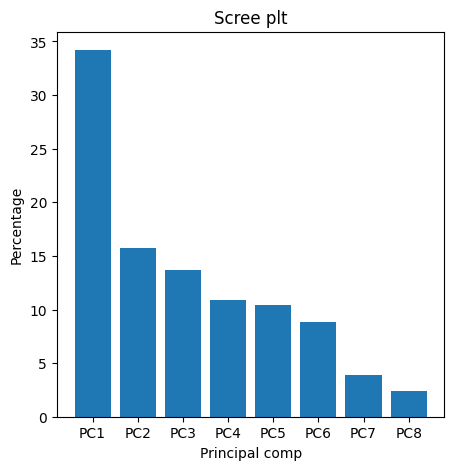

In [50]:
pca = PCA(n_components=8)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.figure(figsize=(5, 5))
plt.bar(x = range(1,len(per_var)+1),height=per_var,tick_label = labels)
plt.ylabel('Percentage')
plt.xlabel('Principal comp')
plt.title('Scree plt')
plt.show()

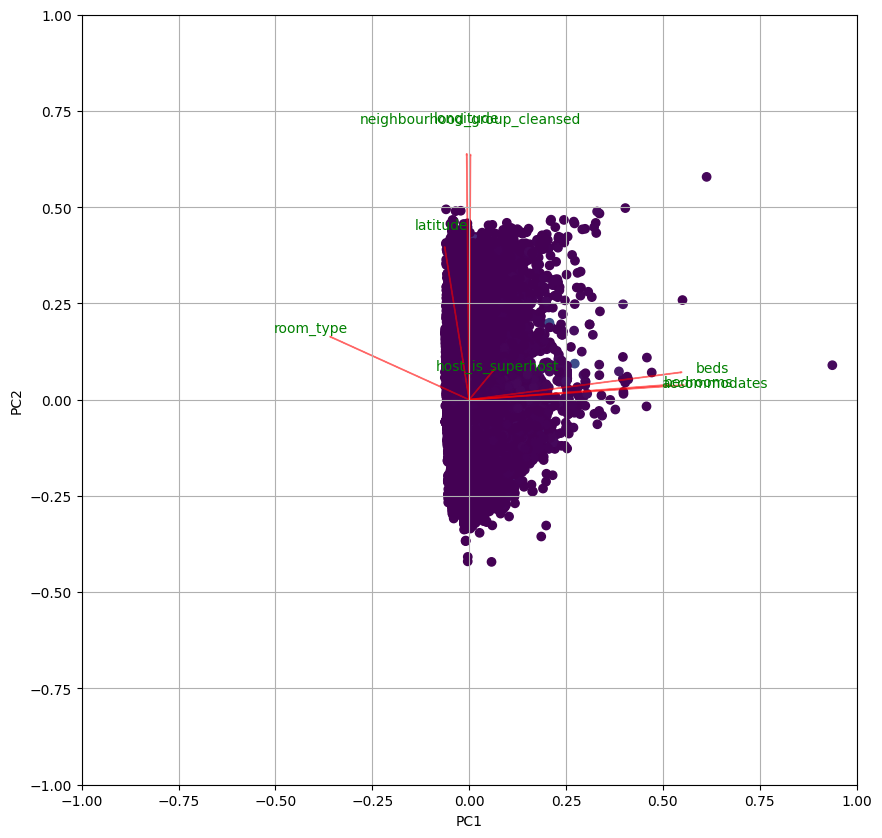

In [51]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.figure(figsize=(10, 10))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
features = [col for col in X]
myplot(pca_data,np.transpose(pca.components_),features)
plt.show()

In [56]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit a linear regression model to predict yield using PC1 and PC2
reg = LinearRegression()
reg.fit(X_train_pca, y_train)

# Compute the R^2 score for the training set
y_train_pred = reg.predict(X_train_pca)
r2_train = r2_score(y_train, y_train_pred)

# Compute the R^2 score for the test set
y_test_pred = reg.predict(X_test_pca)
r2_test = r2_score(y_test, y_test_pred)

print(f"R^2 score for training set: {r2_train}")
print(f"R^2 score for test set: {r2_test}")

R^2 score for training set: 0.028299180413577152
R^2 score for test set: 0.09418399020864021


In [57]:
X

,neighbourhood_group_cleansed,room_type,host_is_superhost,latitude,longitude,accommodates,bedrooms,beds
0,1,2,0,40.640403,-73.888535,2,1.0,1.0
1,1,2,0,40.648510,-73.894330,1,1.0,1.0
2,4,0,0,40.507114,-74.251907,6,2.0,2.0
3,1,2,1,40.583490,-73.959880,2,3.0,1.0
4,0,0,0,40.903260,-73.907090,3,2.0,2.0
...,...,...,...,...,...,...,...,...
42925,2,0,1,40.720300,-73.984240,5,2.0,3.0
42926,2,2,0,40.726110,-73.988010,1,1.0,1.0
42927,2,0,0,40.762150,-73.990270,6,2.0,3.0
42928,2,0,0,40.717330,-73.991110,3,3.0,3.0


Now we merge amenity and other features:

In [ ]:
X = pd.concat([df_non_amenities, df[unique_amenities]], axis=1)
y = df['price']

C:\Users\panaham\AppData\Local\Temp\ipykernel_14940\1347312399.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = pd.concat([df_non_amenities, df[unique_amenities]], axis=1)


In [ ]:
X.head(5)

,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,host_is_superhost,latitude,longitude,accommodates,bedrooms,beds,Shampoo,...,Smoke alarm,Air conditioning,Baking sheet,Dishes and silverware,Hot water kettle,Fire pit,Ping pong table,Mosquito net,Barbecue utensils,Single level home
0,29,1,2,0,40.640403,-73.888535,2,1.0,1.0,0,...,1,0,0,0,1,0,0,0,0,0
1,29,1,2,0,40.648510,-73.894330,1,1.0,1.0,0,...,1,0,0,0,0,0,0,0,0,0
2,196,4,0,0,40.507114,-74.251907,6,2.0,2.0,0,...,0,0,0,0,0,1,0,0,0,0
3,176,1,2,1,40.583490,-73.959880,2,3.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
4,147,0,0,0,40.903260,-73.907090,3,2.0,2.0,0,...,1,0,1,1,0,0,0,0,0,0


In [ ]:
y_train_pred

array([350., 514., 150., ...,  26., 250., 151.])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train, y_train)


y_pred = dt.predict(X_test)


print("R^2 score:", r2_score(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))

R^2 score: 0.06477894847056143
Mean squared error: 189831.75205858427


In [ ]:
from sklearn.ensemble import RandomForestRegressor



rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)

R^2 score: 0.09410512778018032


In [ ]:
print("Mean squared error:", mean_squared_error(y_test, y_pred))

Mean squared error: 183879.10590030445


In [ ]:
X_test

,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,host_is_superhost,latitude,longitude,accommodates,bedrooms,beds,Shampoo,...,Smoke alarm,Air conditioning,Baking sheet,Dishes and silverware,Hot water kettle,Fire pit,Ping pong table,Mosquito net,Barbecue utensils,Single level home
11688,97,2,0,0,40.764050,-73.993240,6,3.0,3.0,0,...,1,1,0,0,1,0,0,0,0,0
27331,215,1,0,0,40.719850,-73.955410,2,1.0,1.0,1,...,1,1,1,1,1,0,0,0,1,0
4459,96,2,0,0,40.823980,-73.943460,10,3.0,5.0,1,...,1,1,0,0,0,0,0,0,0,0
2728,195,4,2,1,40.629800,-74.085270,1,1.0,1.0,1,...,1,0,0,1,0,0,0,0,0,0
11811,27,1,2,1,40.693241,-73.922565,1,1.0,1.0,0,...,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,33,2,0,0,40.746660,-74.001830,3,2.0,2.0,1,...,1,1,0,0,0,0,0,0,0,0
40970,203,2,2,0,40.784240,-73.975030,2,1.0,2.0,1,...,0,1,0,1,0,0,0,0,0,0
26864,7,1,2,1,40.630050,-74.026090,1,1.0,1.0,0,...,1,0,0,0,0,0,0,0,0,0
40538,4,3,0,0,40.762090,-73.912680,6,2.0,4.0,1,...,1,1,0,1,0,0,0,0,0,0


In [ ]:
# Create a function to preprocess the input features
def preprocess_input(neighbourhood_cleansed, neighbourhood_group_cleansed, room_type, host_is_superhost, latitude, longitude, accommodates, bedrooms, beds, amenities_input):
    # Create a dictionary with the input values
    input_dict = {'neighbourhood_cleansed': neighbourhood_cleansed,
                  'neighbourhood_group_cleansed': neighbourhood_group_cleansed,
                  'room_type': room_type,
                  'host_is_superhost': host_is_superhost,
                  'latitude': latitude,
                  'longitude': longitude,
                  'accommodates': accommodates,
                  'bedrooms': bedrooms,
                  'beds': beds}
    
    # Create a DataFrame with the input values

    cat_features = ['neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'room_type']


    for feature in cat_features:
        le = joblib.load(feature + '.joblib')
        input_dict[feature] = le.transform([input_dict[feature]])


    input_df = pd.DataFrame(input_dict, index=[0])
    
    amenities = list(unique_amenities)
    # Create a one-hot encoded DataFrame for the amenities
    amenities_df = pd.DataFrame(columns=amenities)
    for amenity in amenities:
        if amenity in amenities_input:
            amenities_df[amenity] = [1]
        else:
            amenities_df[amenity] = [0]
    
    # # Combine the input DataFrame and amenities DataFrame
    input_df = pd.concat([input_df, amenities_df], axis=1)
    
    return input_df

# Get input values from the user
latitude = float("40.76405046")
longitude = float("-73.9932398")
room_type = "Entire home/apt"
neighbourhood_cleansed = "Hell's Kitchen"
neighbourhood_group_cleansed = "Manhattan"
host_is_superhost = int("0")
accommodates = int("6")
bedrooms = int("3")
beds = int("3")
amenities_input = "Microwave,Indoor fireplace,TV,Dishwasher,Kitchen,Toaster,Refrigerator,Hair dryer,Smoke alarm,Essentials,Oven,Heating,Carbon monoxide alarm,Dining table,Wifi,Washer,Stove,Air conditioning,Dryer,Cooking basics,Hot water kettle,Bed linens,Hot water"
amenities_input = amenities_input.split(",")

# Preprocess the input features
input_df = preprocess_input(neighbourhood_cleansed, neighbourhood_group_cleansed, room_type, host_is_superhost, latitude, longitude, accommodates, bedrooms, beds, amenities_input)

# # Make the prediction
price = rf.predict(input_df)[0]

print("The predicted price is: $", round(price, 2))

The predicted price is: $ 786.08


In [ ]:
input_df

,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,host_is_superhost,latitude,longitude,accommodates,bedrooms,beds,Shampoo,...,Smoke alarm,Air conditioning,Baking sheet,Dishes and silverware,Hot water kettle,Fire pit,Ping pong table,Mosquito net,Barbecue utensils,Single level home
0,97,2,0,0,40.76405,-73.99324,6,3,3,0,...,1,1,0,0,1,0,0,0,0,0


In [ ]:
# calculate the sum of each column's data
column_sums = df[unique_amenities].sum()

# sort the column sums in descending order
sorted_sums = column_sums.sort_values(ascending=False)

# select the top n values
n = 52
largest_sums = sorted_sums[:n]

# print the largest sums
print(largest_sums)

,                               38151
Wifi                            35303
Smoke alarm                     34355
Kitchen                         34045
Essentials                      31423
TV                              29540
Carbon monoxide alarm           29525
Hangers                         27302
Heating                         26830
Hot water                       24989
Air conditioning                24729
Iron                            24020
Dishes and silverware           21669
Shampoo                         21484
Refrigerator                    21124
Cooking basics                  19717
Bed linens                      18982
Coffee                          18814
Microwave                       18687
Fire extinguisher               17767
Dedicated workspace             16257
First aid kit                   16090
Self check-in                   14275
Oven                            13734
Extra pillows and blankets      13162
Long term stays allowed         12633
Stove       

C:\Users\panaham\AppData\Local\Temp\ipykernel_14940\1334626571.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  column_sums = df[unique_amenities].sum()


In [ ]:
import pandas as pd
import statsmodels.api as sm

# create a linear regression model with price as the dependent variable
# and all the amenity columns as the independent variables
X = df[unique_amenities]
X = sm.add_constant(X)
y = df['price']
model = sm.OLS(y, X)
results = model.fit()

# print the results summary
print(results.summary())


C:\Users\panaham\AppData\Local\Temp\ipykernel_14940\4081836993.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = df[unique_amenities]


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     6.140
Date:                Thu, 20 Apr 2023   Prob (F-statistic):          6.49e-106
Time:                        15:37:11   Log-Likelihood:            -3.0946e+05
No. Observations:               38286   AIC:                         6.192e+05
Df Residuals:                   38140   BIC:                         6.205e+05
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
